https://github.com/obulygin/pyda_homeworks/blob/master/visualization/visualization.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = [15,10] 

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Дополнительная часть (необязательная)

- построить дополнительно не менее 2 визуализаций (итого не менее 6);
- в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix.

In [3]:
apps = pd.read_csv('googleplaystore.csv')
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
# в рейтингах есть выбивающееся значение
apps['Rating'].sort_values().unique()

array([ 1. ,  1.2,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. , 19. ,  nan])

In [6]:
# в этой строке сбились столбцы, нет категории, получить ее из Genres невозможно, значения тоже нет
apps.loc[ apps['Rating'] == 19.0 ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [7]:
# исходя из этого принимаем решение удалить строку
drop_index = apps.loc[ apps['Rating'] == 19.0 ].index
apps.drop(index=drop_index, inplace=True)
apps.reset_index
apps['Rating'].sort_values().unique()

array([1. , 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4,
       2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
       3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ,
       nan])

In [8]:
# приведем столбцы к числовым типам
apps['Reviews'] = pd.to_numeric(apps['Reviews'])
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'])

apps['Installs'] = apps['Installs'].replace(r'\+|,', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'])

apps['Price'] = apps['Price'].replace(r'\$', '', regex=True)
apps['Price'] = pd.to_numeric(apps['Price'])

In [9]:
print(apps['App'].count())
print(len(apps['App'].unique()))

10840
9659


In [10]:
most_freq = apps['App'].value_counts().index[0]

In [11]:
# приложения в датафрейме повторяются, при этом у одного приложения может быть несколько категорий
most_freq_df = apps.loc[ apps['App'] == most_freq ].sort_values(['Last Updated', 'Reviews'], ascending=False)
most_freq_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [12]:
# избавимся от дублей, разделим датафрейм
# для первого датафрейма уберем дубли по сочетанию названия приложения и категории
apps.sort_values(['Last Updated', 'Reviews'], ascending=False)
uniq_app_cat = apps.drop_duplicates(subset=['App', 'Category'])
uniq_app_cat.reset_index
uniq_app_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9744 non-null   object        
 1   Category        9744 non-null   object        
 2   Rating          8280 non-null   float64       
 3   Reviews         9744 non-null   int64         
 4   Size            9744 non-null   object        
 5   Installs        9744 non-null   int64         
 6   Type            9743 non-null   object        
 7   Price           9744 non-null   float64       
 8   Content Rating  9744 non-null   object        
 9   Genres          9744 non-null   object        
 10  Last Updated    9744 non-null   datetime64[ns]
 11  Current Ver     9736 non-null   object        
 12  Android Ver     9742 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


In [13]:
# для второго датафрейма уберем дубли по названию
apps.sort_values(['Last Updated', 'Reviews'], ascending=False)
uniq_app = apps.drop_duplicates(subset=['App'])
uniq_app.reset_index
uniq_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            9659 non-null   object        
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


Рассмотрим наиболее интересные для анализа приложений столбцы: Installs, Reviews, Rating.

Начнем с boxplot по Installs и Reviews, проверим есть ли выбросы.

<AxesSubplot:>

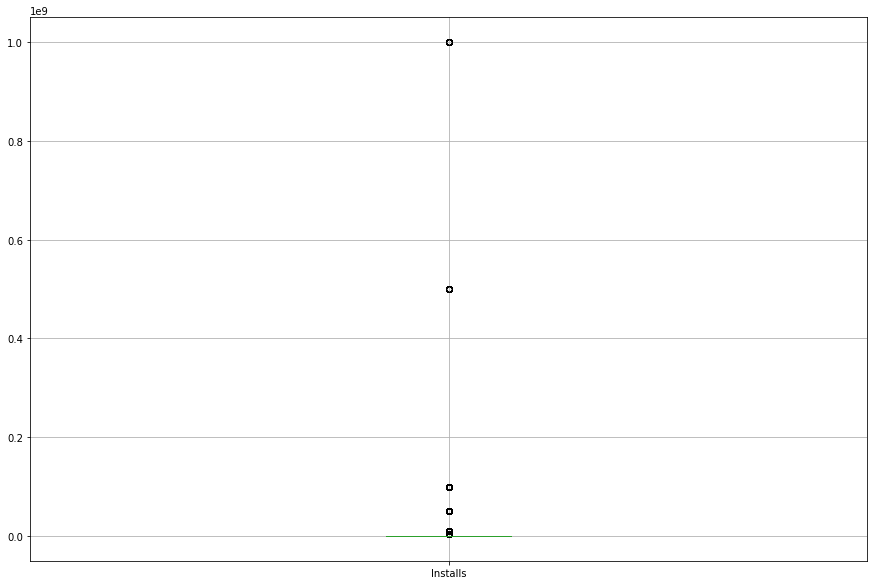

In [14]:
uniq_app['Installs'].plot(kind='box', grid=True)

<AxesSubplot:>

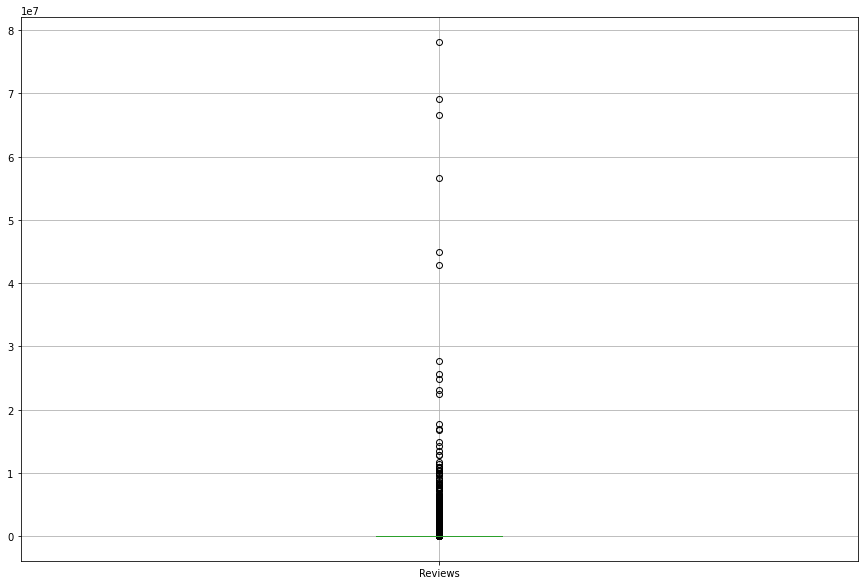

In [15]:
uniq_app['Reviews'].plot(kind='box', grid=True)

Рассмотрим выбросы подробнее. Вероятно данные корректные, выбросы по установкам и отзывам — очень популярные приложения, для которых такое количество установок и отзывов нормально.

In [16]:
def outliers(column):
    q1 = uniq_app[column].loc[ ~uniq_app[column].isna() ].quantile(0.25)
    q3 = uniq_app[column].loc[ ~uniq_app[column].isna() ].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    check = uniq_app[~uniq_app[column].between(lower_bound, upper_bound, inclusive='both')]
    count = check[column].count()
    min_ = check[column].min()
    max_ = check[column].max()
    return f'{column} outliers - {count}, min - {min_}, max - {max_}'

In [17]:
col_numeric = ['Reviews', 'Installs']

In [18]:
list(map(outliers, col_numeric))

['Reviews outliers - 1656, min - 73539, max - 78158306',
 'Installs outliers - 1978, min - 5000000, max - 1000000000']

In [19]:
uniq_app.sort_values(['Installs', 'Reviews'], ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76M,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,2018-08-02,Varies with device,Varies with device
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0.0,Everyone,Photography,2018-08-06,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,Varies with device,Varies with device


Посмотрим на топ-5 категорий приложений.

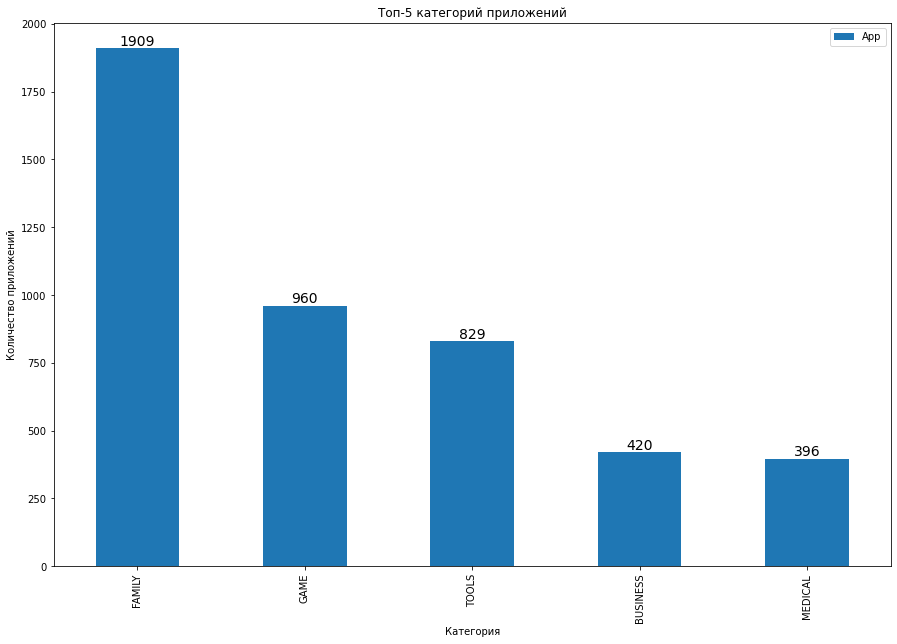

In [20]:
top_five = uniq_app_cat[['Category', 'App']].groupby('Category').count().sort_values('App', ascending=False).head(5)
top_five.plot(kind='bar',
              title='Топ-5 категорий приложений',
              xlabel='Категория',
              ylabel='Количество приложений')
for i, val in enumerate(top_five.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':14})

Вероятно для одного и того же приложения могут указывать несколько категорий для большего охвата, и чаще всего дополнительной категорией указывают FAMILY. Как пример, ранее найденное приложение ROBLOX, для которого проставляли и GAME, и FAMILY:

In [21]:
most_freq_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


Рассмотрим оценки приложений, для этого используем второй датафрейм, в котором каждое приложение уникально.

<AxesSubplot:xlabel='Rating', ylabel='Count'>

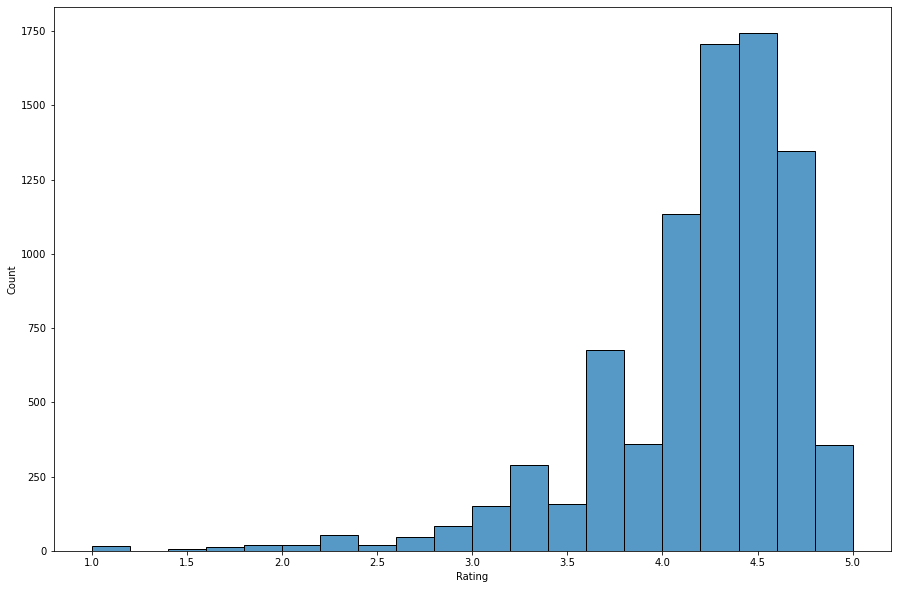

In [22]:
sns.histplot(uniq_app['Rating'], bins=20)

<AxesSubplot:>

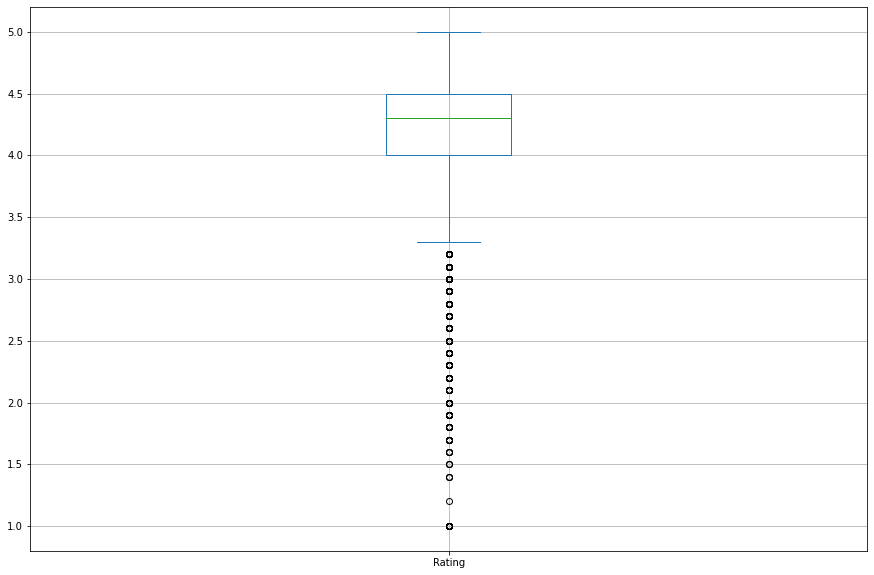

In [23]:
uniq_app['Rating'].plot(kind='box', grid=True)

По выбросам с низким рейтингом основная масса приложенией с небольшим количеством установок

In [24]:
uniq_app.loc[ uniq_app['Rating'] < 3.3 ].pivot_table(index='Installs',
                                                     values='App',
                                                     aggfunc='count').fillna(0)

,App
Installs,
5,1
10,5
50,6
100,35
500,24
1000,99
5000,50
10000,102
50000,44


Рассмотрим связь между рейтингами приложений, количеством отзывов и установок.

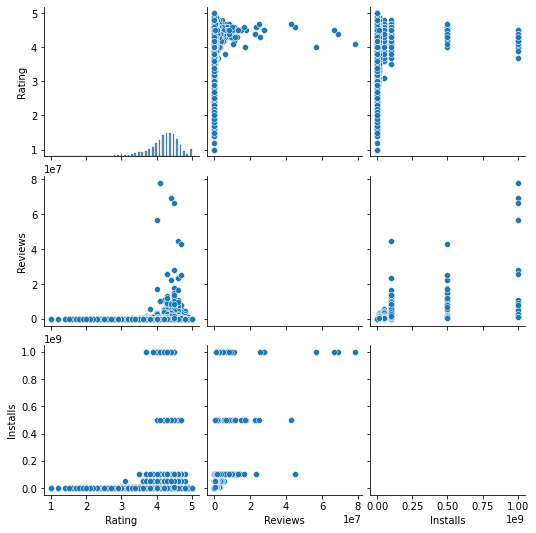

In [25]:
sns.pairplot(uniq_app[['Rating', 'Reviews', 'Installs']])
plt.show()

Прослеживается связь между количеством скачиваний и рейтингом, и между количеством отзывов и рейтингом.